## Time-Series analysis to predict future sales 

#### Here we are going to predict what will be the future sales growth of Air-Plains
#### using Time-Series Analysis based on Air-Passengers koggle data 

In [158]:
#for data analysis/data processing
import numpy as np
import pandas as pd
#for data visulization creating plots
import matplotlib.pylab as plt
#to display plots in your jupyter, not to display in another window
%matplotlib inline 
from matplotlib.pylab import rcParams
#defining size
rcParams['figure.figsize'] = 10, 6

In [159]:
#Loading dataset
dataset = pd.read_csv("D:/DataScience/AirPassengers.csv")
print("Length of our dataset is :", len(dataset))
dataset.describe()


Length of our dataset is : 144


,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [44]:
#passe those strings in date time formate
#here we have set our data Month wise
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format = True)
#index variable as Month
indexed_dataset = dataset.set_index(['Month'])

In [45]:
#importing datetime
from datetime import datetime
#resulting top 5 data information
indexed_dataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### as we seen above, we have Month as an index and number of Passengers per Month as 2nd column

In [46]:
indexed_dataset.tail(5)

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


#### so here we have data of every Month number of Passengers who took that Plain from 1949 to 1960

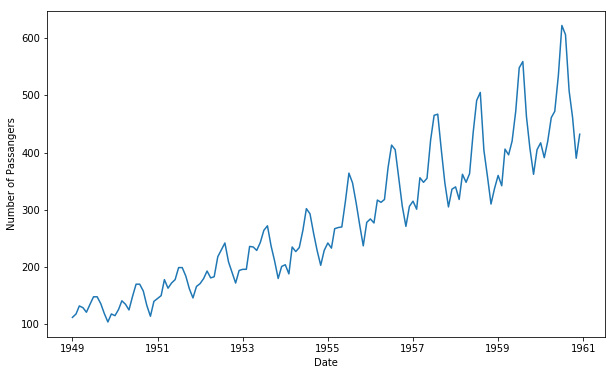

In [47]:
#Plot graphs

plt.xlabel("Date")
plt.ylabel("Number of Passangers")
plt.plot(indexed_dataset)

#### as we seen above, we have trend, the next thing is to check the stationary
#### The given data is non-stationary
#### Because as we seen in visualisation, the trend is going up (upword trend)
#### if you calculate mean, it's not a constatnt value (ex: from 1951 to 1959)
#### so based on above 2 reasons the data is non-stationary

### There are 2 Tests to check the stationary of data (1. Rolling Statistics 2. ADCF)

In [33]:
#Determining rolling statistics

roll_mean = indexed_dataset.rolling(window=12).mean()

roll_std = indexed_dataset.rolling(window=12).std()
#here meand and variance yearly as we mentioned window of 12 months
#we can chnage the window of 12 to play around data (early to monthly by changing from 12 to 1/6)

print("Mean information \n\n", roll_mean)
print("\n std information \n\n", roll_std)

Mean information 

             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666

In [37]:
roll_mean = indexed_dataset.rolling(window=1).mean()
roll_std = indexed_dataset.rolling(window=5).std()

print("Mean information \n\n", roll_mean)
print("\n std information \n\n", roll_std)

Mean information 

             #Passengers
Month                  
1949-01-01        112.0
1949-02-01        118.0
1949-03-01        132.0
1949-04-01        129.0
1949-05-01        121.0
1949-06-01        135.0
1949-07-01        148.0
1949-08-01        148.0
1949-09-01        136.0
1949-10-01        119.0
1949-11-01        104.0
1949-12-01        118.0
1950-01-01        115.0
1950-02-01        126.0
1950-03-01        141.0
1950-04-01        135.0
1950-05-01        125.0
1950-06-01        149.0
1950-07-01        170.0
1950-08-01        170.0
1950-09-01        158.0
1950-10-01        133.0
1950-11-01        114.0
1950-12-01        140.0
1951-01-01        145.0
1951-02-01        150.0
1951-03-01        178.0
1951-04-01        163.0
1951-05-01        172.0
1951-06-01        178.0
...                 ...
1958-07-01        491.0
1958-08-01        505.0
1958-09-01        404.0
1958-10-01        359.0
1958-11-01        310.0
1958-12-01        337.0
1959-01-01        360.0
1959-02-01        34

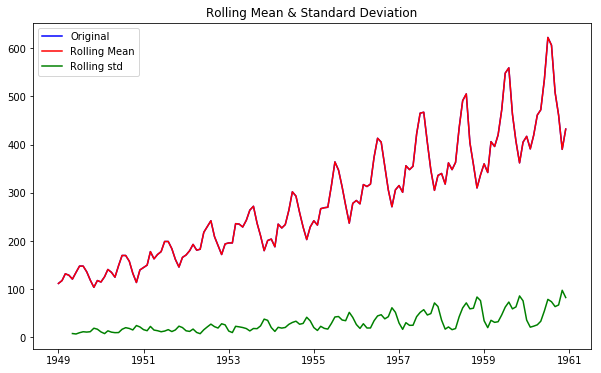

In [51]:
#Plotting Rolling statistics

original = plt.plot(indexed_dataset, color='blue', label='Original')
mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
std = plt.plot(roll_std, color='green', label='Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [56]:
#Performing Dicky-Fuller tests
from statsmodels.tsa.stattools import adfuller
#adfuller is a function which is provided in dicky-fuller test

print("Results of Dicky_Fuller Test: ")
dftest = adfuller(indexed_dataset['#Passengers'], autolag='AIC')
#AIC means Akaike information criterion 
#AIC:estimates the quality of each model, relative to each of the other models
#inorder to provide the means for selecting a model
#AIC simply analyzes the difference between exact value and analysed value

dfoutput = pd.Series(dftest[0:4], index=('test_statistics', 'p-value', '#Lags Used', 'Number of Observations Used'))
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]= value
    
print(dfoutput)
    

Results of Dicky_Fuller Test: 
test_statistics                  0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


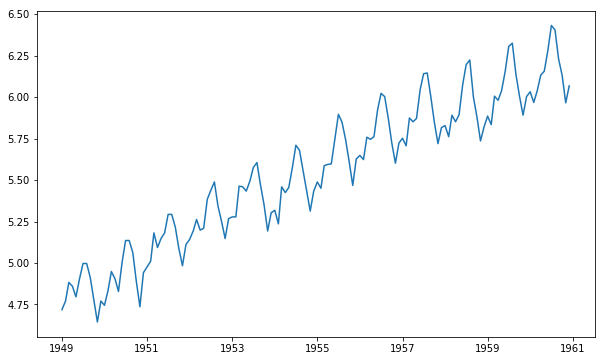

In [57]:
#Estimating Trend
indexed_dataset_logScale = np.log(indexed_dataset)
#here we are taking logs of data which already been set per monthly
plt.plot(indexed_dataset_logScale)

#### as above, scale on y-axis been changed but trend remains same yet

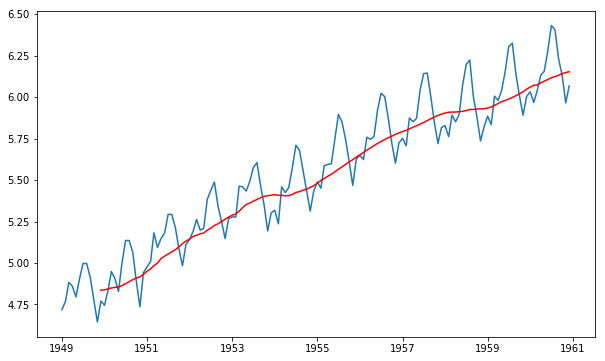

In [60]:
#lets calculate the moving avaerage with the same window
#this time we take up with log time seires
MovingAverage = indexed_dataset_logScale.rolling(window=12).mean()
MovingSTD =indexed_dataset_logScale.rolling(window=12).std()
plt.plot(indexed_dataset_logScale)
plt.plot(MovingAverage, color='red')
#now here the data is already in log form

#### as we seen above, the mean is not stationary as it's moving with time
#### Trend: upword Trend so we can conclude that data is not stationay 

In [62]:
#now we get the difference between movingaverage & actual number of passengers

datasetLogScaleMinusMovingAverage = indexed_dataset_logScale - MovingAverage
datasetLogScaleMinusMovingAverage.head(12)

#remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(15)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [71]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining rolling statistics
    MovingAverage = timeseries.rolling(window=12).mean()
    MovingSTD = timeseries.rolling(window=12).std()
    
    #PLotting rolling statistics
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(MovingAverage, color='red', label='Rolling Mean')
    std = plt.plot(MovingSTD, color='green', label='Rolling std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dicky-Fuller Test
    print("Results of Dicky_Fuller Test: ")
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=('test_statistics', 'p-value', '#Lags Used', 'Number of Observations Used'))
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key]= value
    
    print(dfoutput)

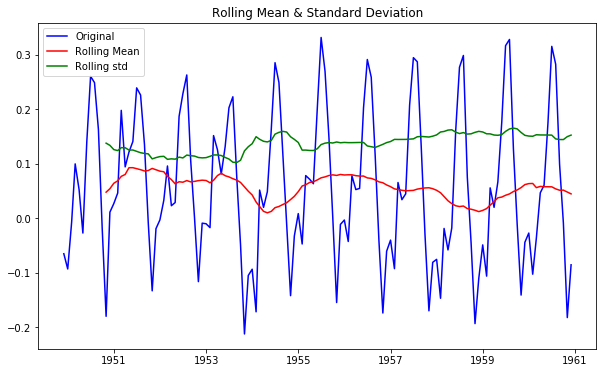

Results of Dicky_Fuller Test: 
test_statistics                 -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [72]:
test_stationarity(datasetLogScaleMinusMovingAverage)

### So, p-value is very less comparitively before
### test-statistics alomost equal to critical-value
#### those 2 points very useful to check wether data is stationay or not

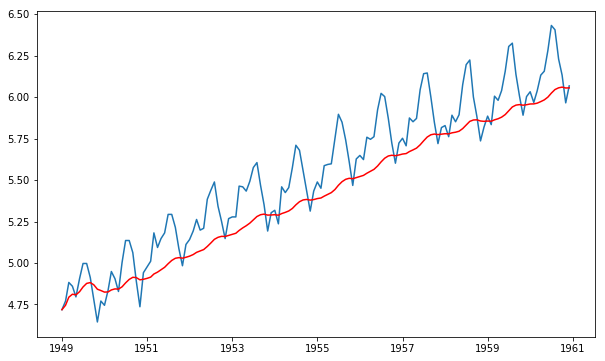

In [75]:
exponentialDecayWeightedAverage = indexed_dataset_logScale.ewm(halflife = 12, min_periods = 0, adjust=True).mean()
plt.plot(indexed_dataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')


#### as we seen here, as timeseries progress and average also progressed towords heigher side
#### here the trend is upword and keep on increasing with respect to time

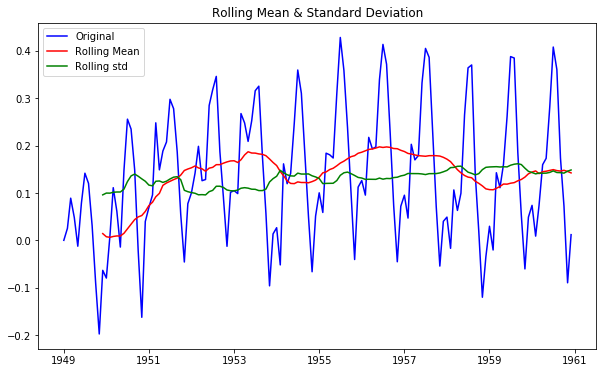

Results of Dicky_Fuller Test: 
test_statistics                 -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [77]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexed_dataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

#### from above results, check p-value and test statistics with critical values which are exactly to be our data is stationary

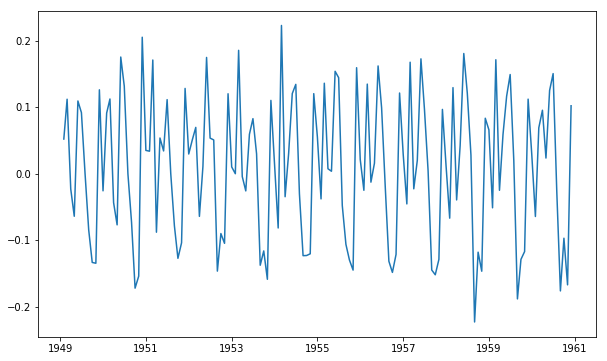

In [79]:
# earlier what we done is, take difference of mean from actual value
datasetLogDiffShifting = indexed_dataset_logScale - indexed_dataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

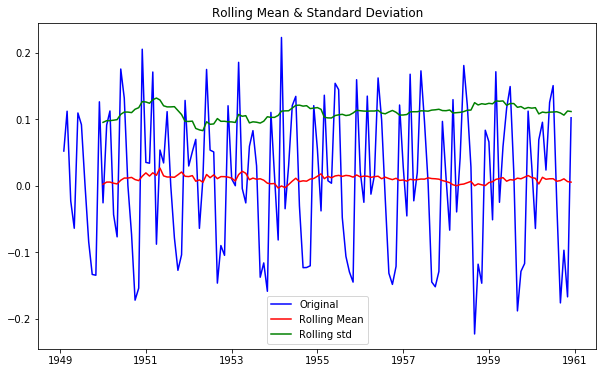

Results of Dicky_Fuller Test: 
test_statistics                 -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [80]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

### as we seen above visually the original, rolling mean and std, there is no trend present quit flat
## Hence we can say that our timeseries is stationary

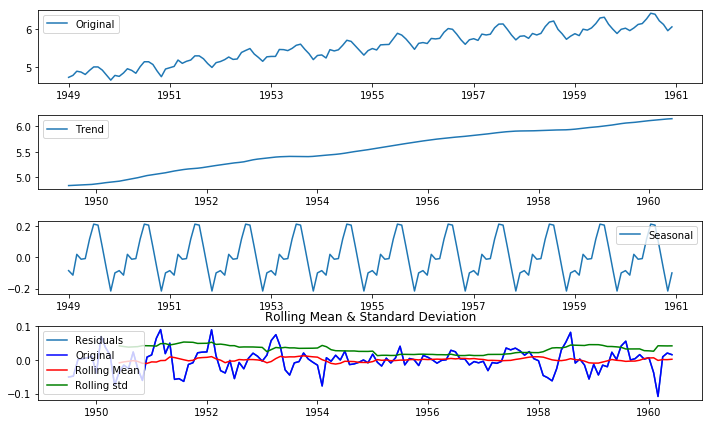

Results of Dicky_Fuller Test: 
test_statistics               -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [85]:
#lets see the components of timeseries
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =seasonal_decompose(indexed_dataset_logScale)

#here seasonal_decompose has 3 components 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexed_dataset_logScale, label='Original')
plt.legend(loc ='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc ='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc ='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc ='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

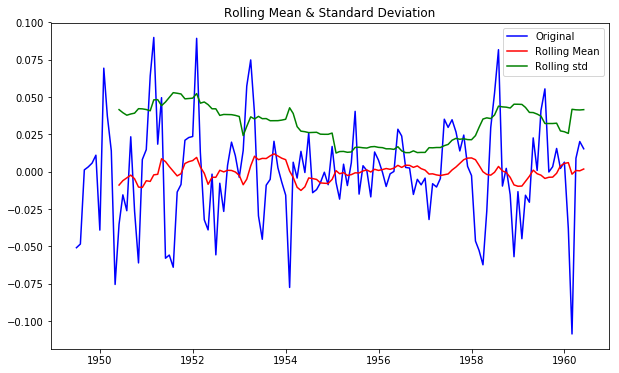

Results of Dicky_Fuller Test: 
test_statistics               -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [86]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

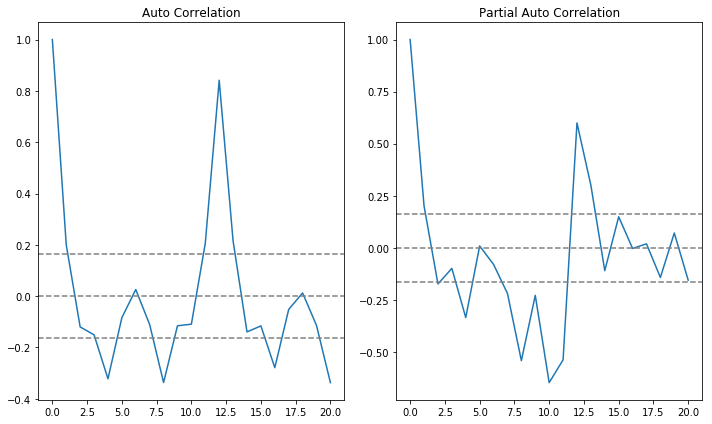

In [99]:
#Plot ACF and PACF 
#acf: auto correlation
#pacf: partial auto correlation
#inorder to calculate p, we need to calculate pacf graph
#inorder to calculate q, we need to calculate acf graph
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags = 20)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 20, method='ols')
#ols: ordinary least square method

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle="--", color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle="--", color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle="--", color='gray')
plt.title('Auto Correlation')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle="--", color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle="--", color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle="--", color='gray')
plt.title('Partial Auto Correlation')
plt.tight_layout()

C:\Users\Palugudi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Palugudi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


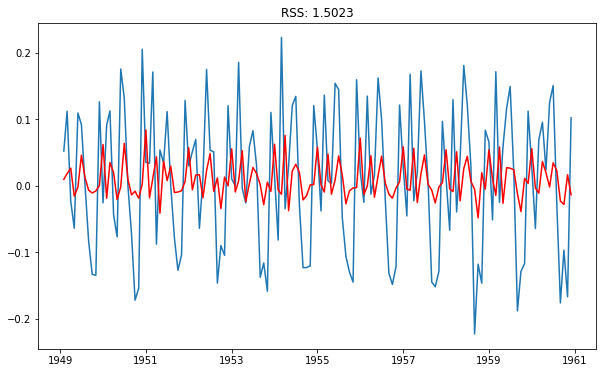

In [128]:
#ARIMA MODEL which has 2 models ( AR model and MA model)

#AR Model(auto regressive)
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexed_dataset_logScale, order=(2, 1, 0)) #we can change these p,d,q values
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print("Plotting AR Model")

#if RSS is greater it's a bad one

C:\Users\Palugudi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Palugudi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


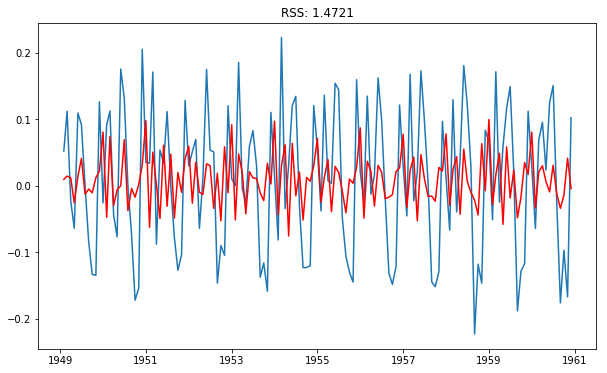

In [124]:
#MA MOdel
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexed_dataset_logScale, order=(0, 1, 2)) #we can change these p,d,q values
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print("Plotting MA Model")

#if RSS is greater it's a bad one

C:\Users\Palugudi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Palugudi\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting ARIMA Model


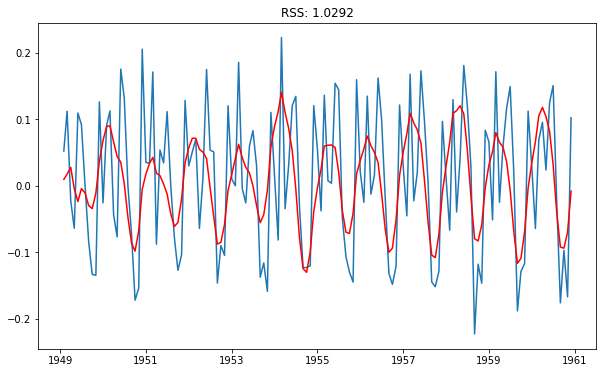

In [127]:
#ARIMA MODEL
model = ARIMA(indexed_dataset_logScale, order=(2, 1, 2)) #we can change these p,d,q values
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print("Plotting ARIMA Model")

#if RSS is greater it's a bad one

In [129]:
#lets fit them in a combine model(ARIMA)

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())


Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [130]:
#convert cumulative sum

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [135]:
#Predictions
predictions_ARIMA_log = pd.Series(indexed_dataset_logScale['#Passengers'].iloc[0], index = indexed_dataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

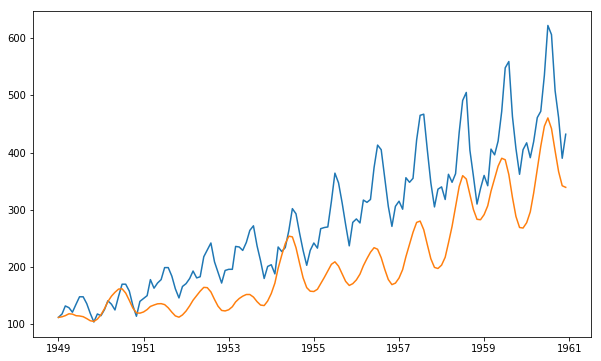

In [138]:
#data transformation exponent of it to get data in your original format
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexed_dataset)
plt.plot(predictions_ARIMA)
#now we can see how our predicted values fitted into actual values

### The shape exactly captured by the arima model except magnitudes

In [139]:
indexed_dataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


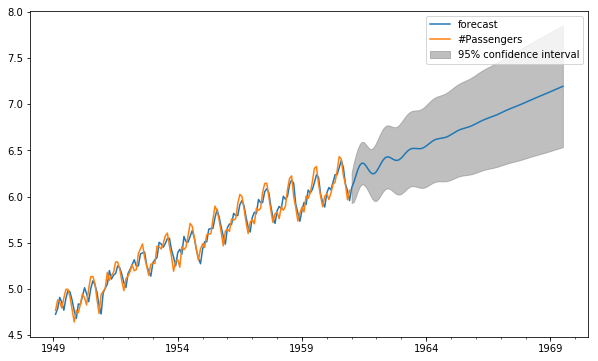

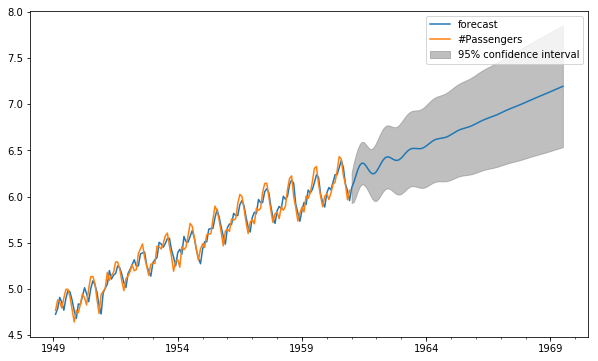

In [145]:
### as we seen that e got 144 rows in 1 column
### so whatever if i want to predict for next 10 years: 10x12 (12 as we mentioned already months)
## so for next 10 years = 10x12= 120 and we got 144 rows; 120+144 = 246

#results through graph (results visualization)
results_ARIMA.plot_predict(1,246)


In [147]:
#results in array format
results_ARIMA.forecast(steps=12)

(array([6.09553406, 6.15281429, 6.22442997, 6.2924113 , 6.34164736,
        6.36359367, 6.35784677, 6.33139285, 6.29597517, 6.26447694,
        6.24738317, 6.25025176]),
 array([0.08384711, 0.10749462, 0.11568695, 0.11702774, 0.11703496,
        0.11744018, 0.1176225 , 0.11778713, 0.12024162, 0.12736041,
        0.13870957, 0.15118789]),
 array([[5.93119674, 6.25987139],
        [5.9421287 , 6.36349987],
        [5.99768773, 6.45117222],
        [6.06304114, 6.52178147],
        [6.11226305, 6.57103167],
        [6.13341516, 6.59377219],
        [6.1273109 , 6.58838264],
        [6.1005343 , 6.56225139],
        [6.06030592, 6.53164441],
        [6.01485513, 6.51409875],
        [5.9755174 , 6.51924893],
        [5.95392894, 6.54657459]]))

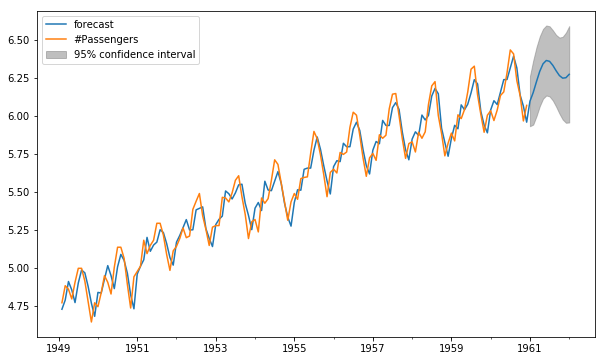

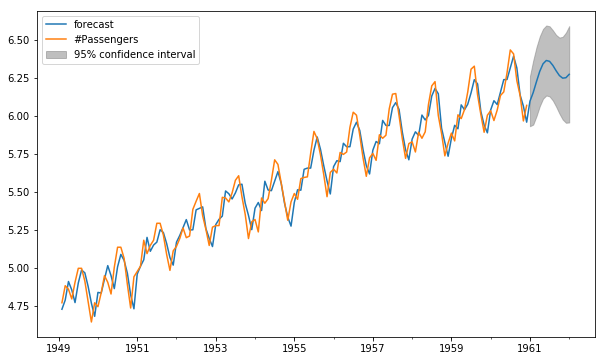

In [148]:
#results through graph (results visualization)
results_ARIMA.plot_predict(1,156)

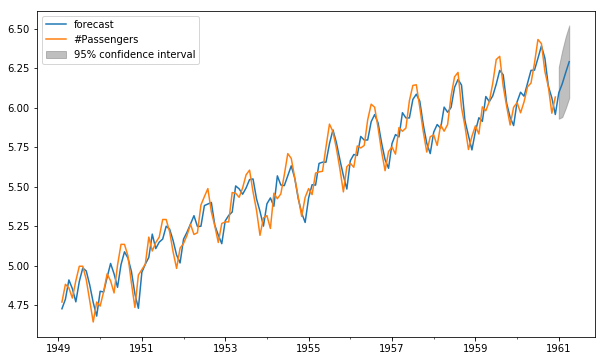

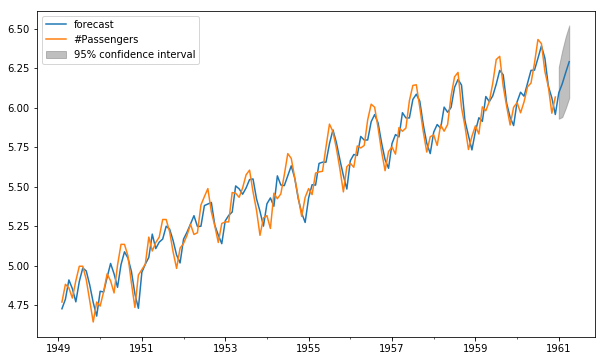

In [151]:
results_ARIMA.plot_predict(1,147)